<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import sys
if 'piplite' in sys.modules:
    print('piplite is installed')
else:
    print('piplite is not installed')


piplite is not installed


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [4]:
pip install js

Note: you may need to restart the kernel to use updated packages.


In [7]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [8]:
## Exploratory Data Analysis
brew install nodejs

SyntaxError: invalid syntax (1029328611.py, line 2)

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [15]:
# Download and read the `spacex_launch_geo.csv`
#from js import fetch
#import io

URL=("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
#resp = await fetch(URL)
#spacex_csv_file = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(URL)
df.tail(15)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
75,76,2020-03-07,Falcon 9,1977.000000,ISS,CCAFS SLC 40,True RTLS,2,True,True,True,5e9e3032383ecb267a34e7c7,5.0,3,B1059,-80.577366,28.561857,1
76,77,2020-03-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0
77,78,2020-04-22,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
78,79,2020-05-30,Falcon 9,9525.000000,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
79,80,2020-06-04,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,5,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1049,-80.577366,28.561857,1
80,81,2020-06-13,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1059,-80.577366,28.561857,1
81,82,2020-06-30,Falcon 9,3880.000000,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
82,83,2020-07-20,Falcon 9,6104.959412,GEO,CCAFS SLC 40,True ASDS,2,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1058,-80.577366,28.561857,1
83,84,2020-08-18,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1049,-80.577366,28.561857,1
84,85,2020-08-30,Falcon 9,1600.000000,SSO,CCAFS SLC 40,True RTLS,4,True,True,True,5e9e3032383ecb267a34e7c7,5.0,3,B1059,-80.577366,28.561857,1


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [9]:
print(df.columns)

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


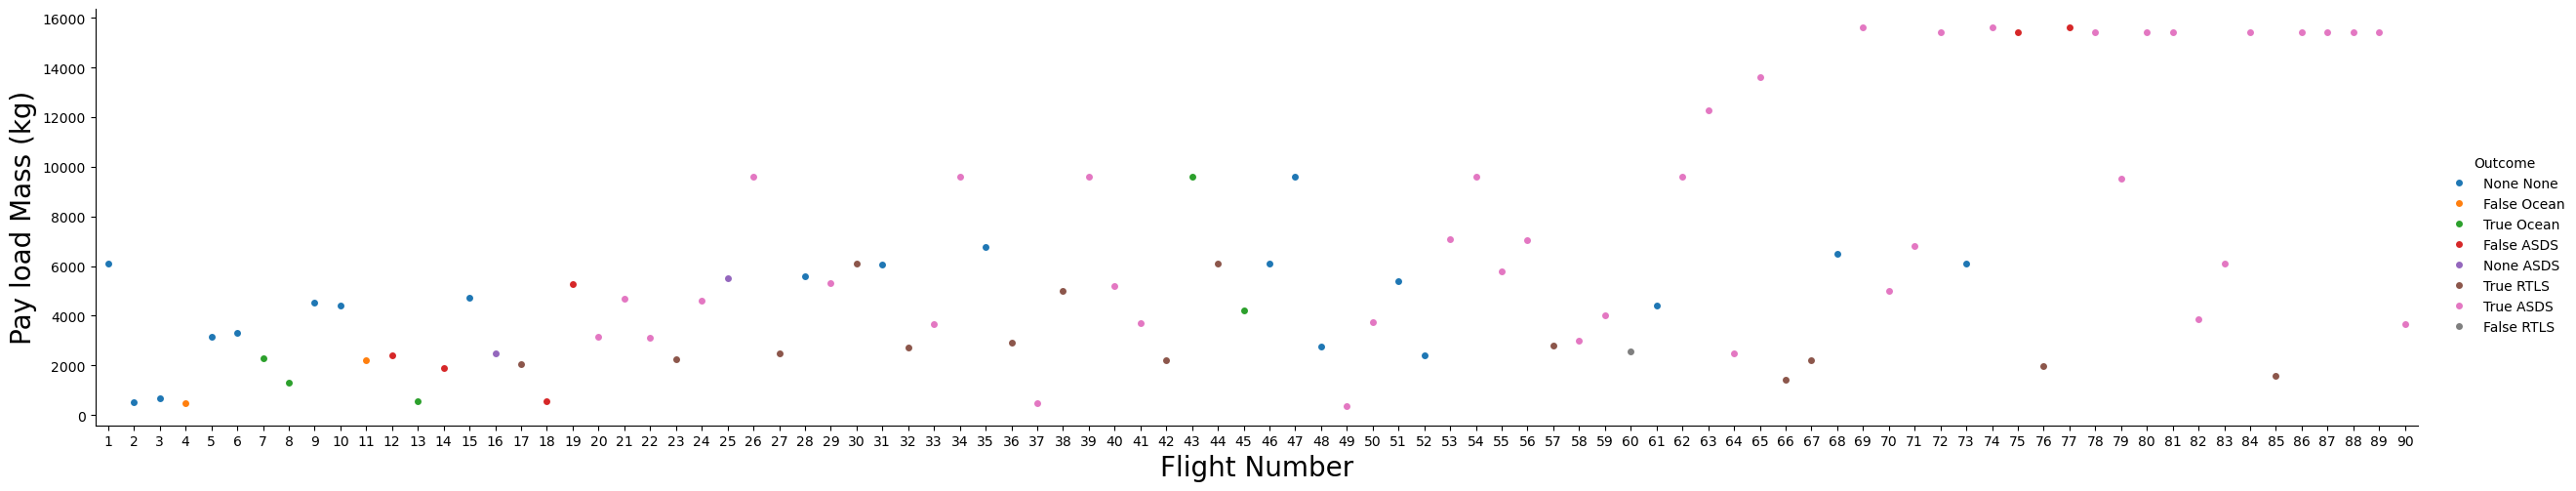

In [20]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue='Outcome', data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


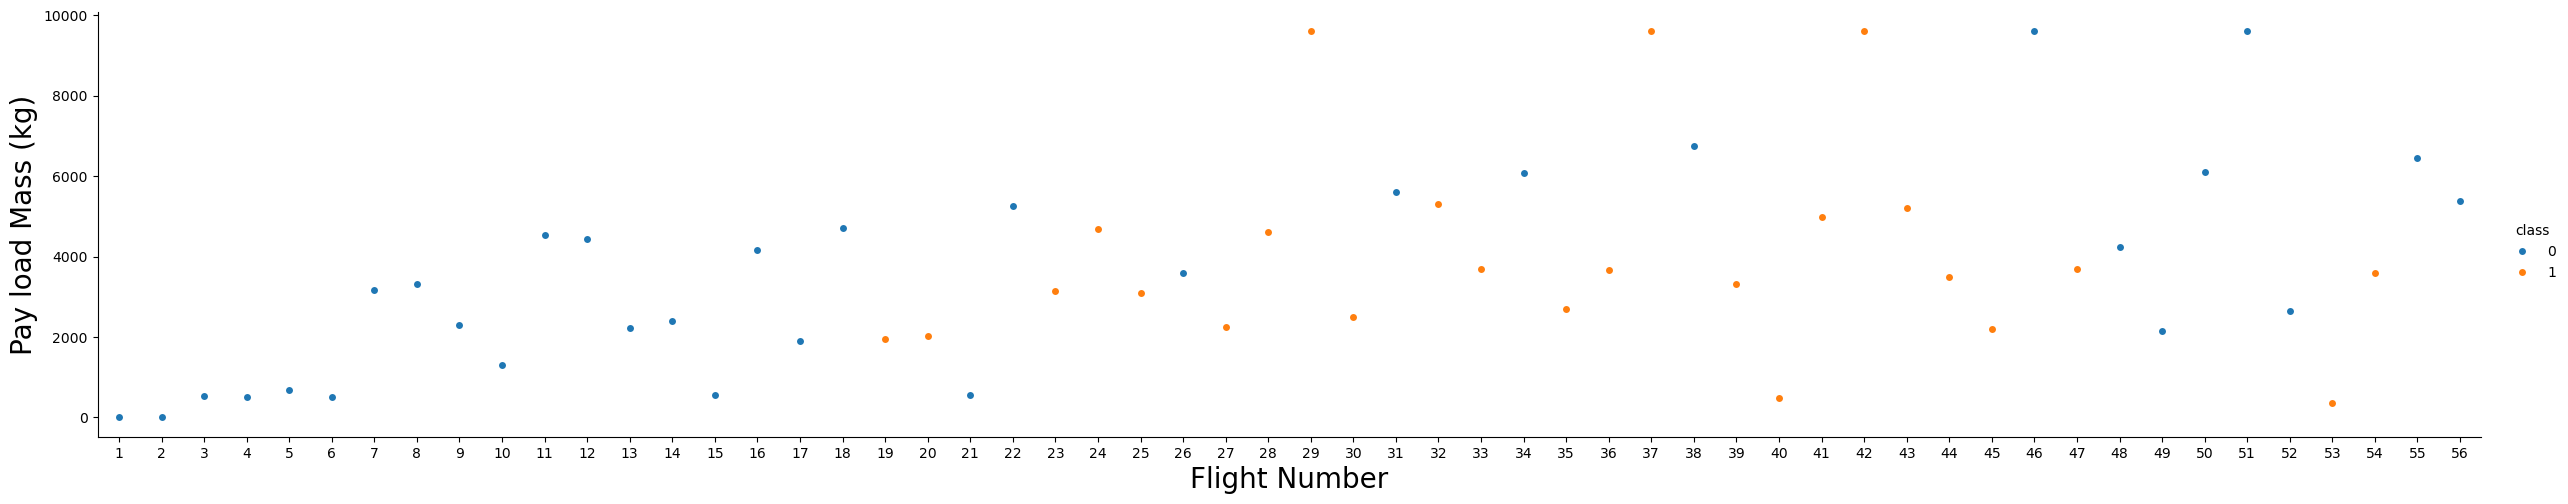

In [45]:
sns.catplot(y="Payload Mass (kg)", x="Flight Number", hue="class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(30.460754166666675, 0.5, 'Flight Number')

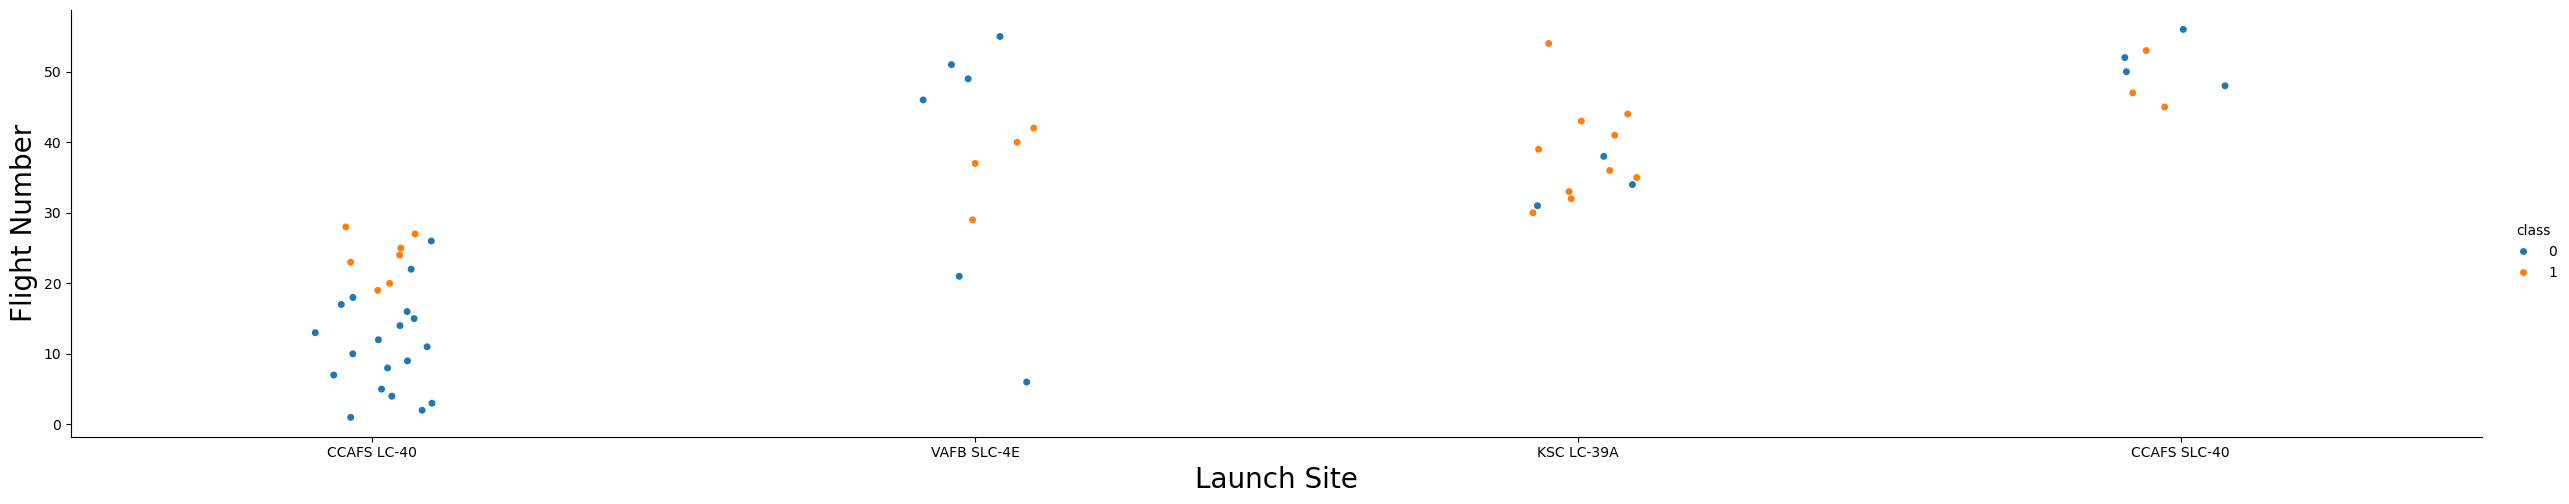

In [12]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y='Flight Number', x='Launch Site', hue='class', data=df, aspect = 5)
plt.xlabel('Launch Site', fontsize = 20)
plt.ylabel('Flight Number', fontsize = 20)

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


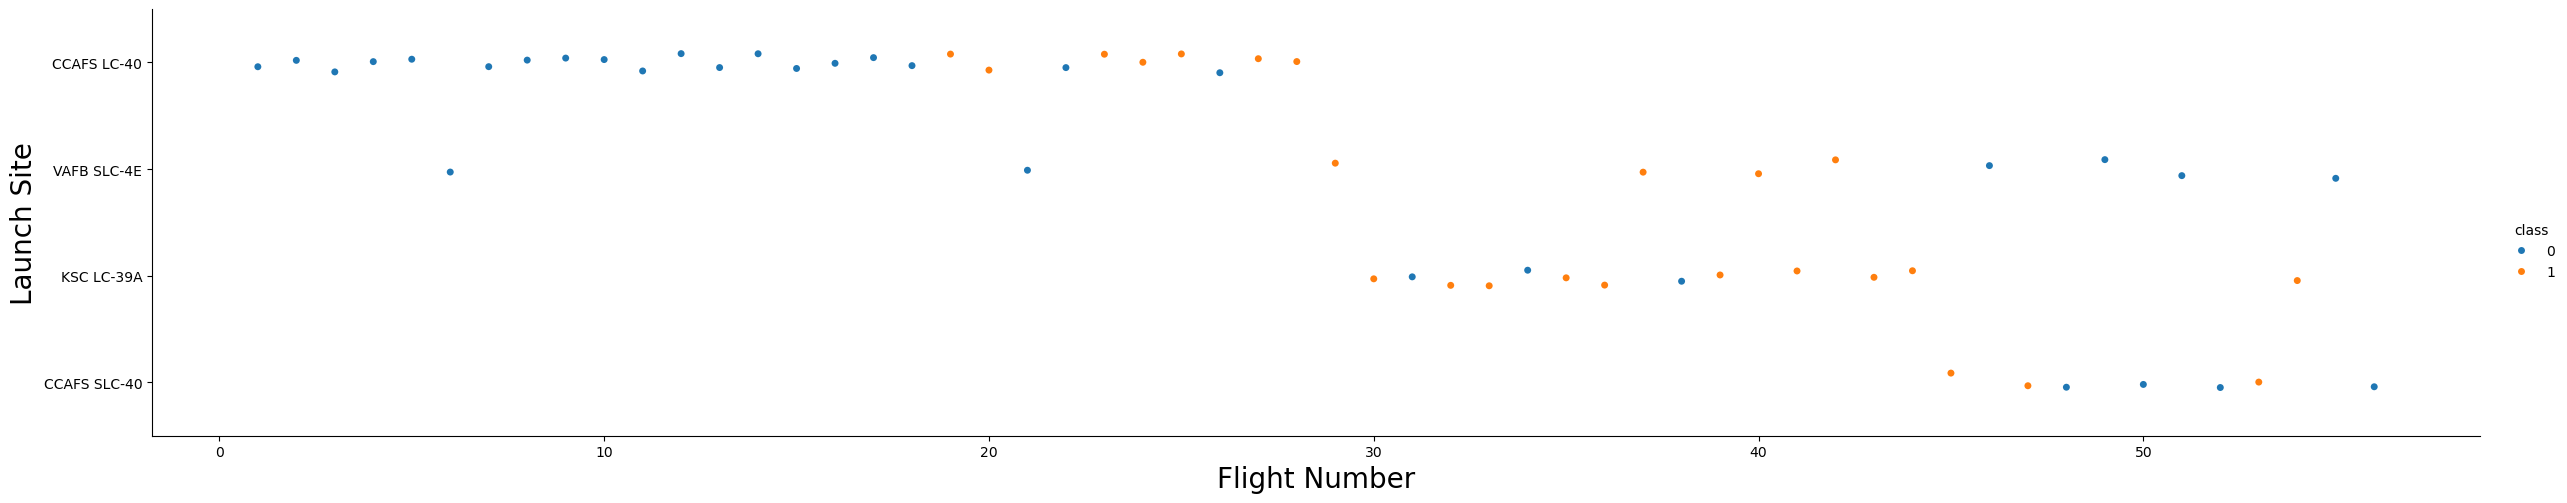

In [13]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='Launch Site', x='Flight Number', hue='class', data=df, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


KSC seems to be the best flight model with the highest success rate. VAFB is a close second CCAFS became better with time.

In [14]:
### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


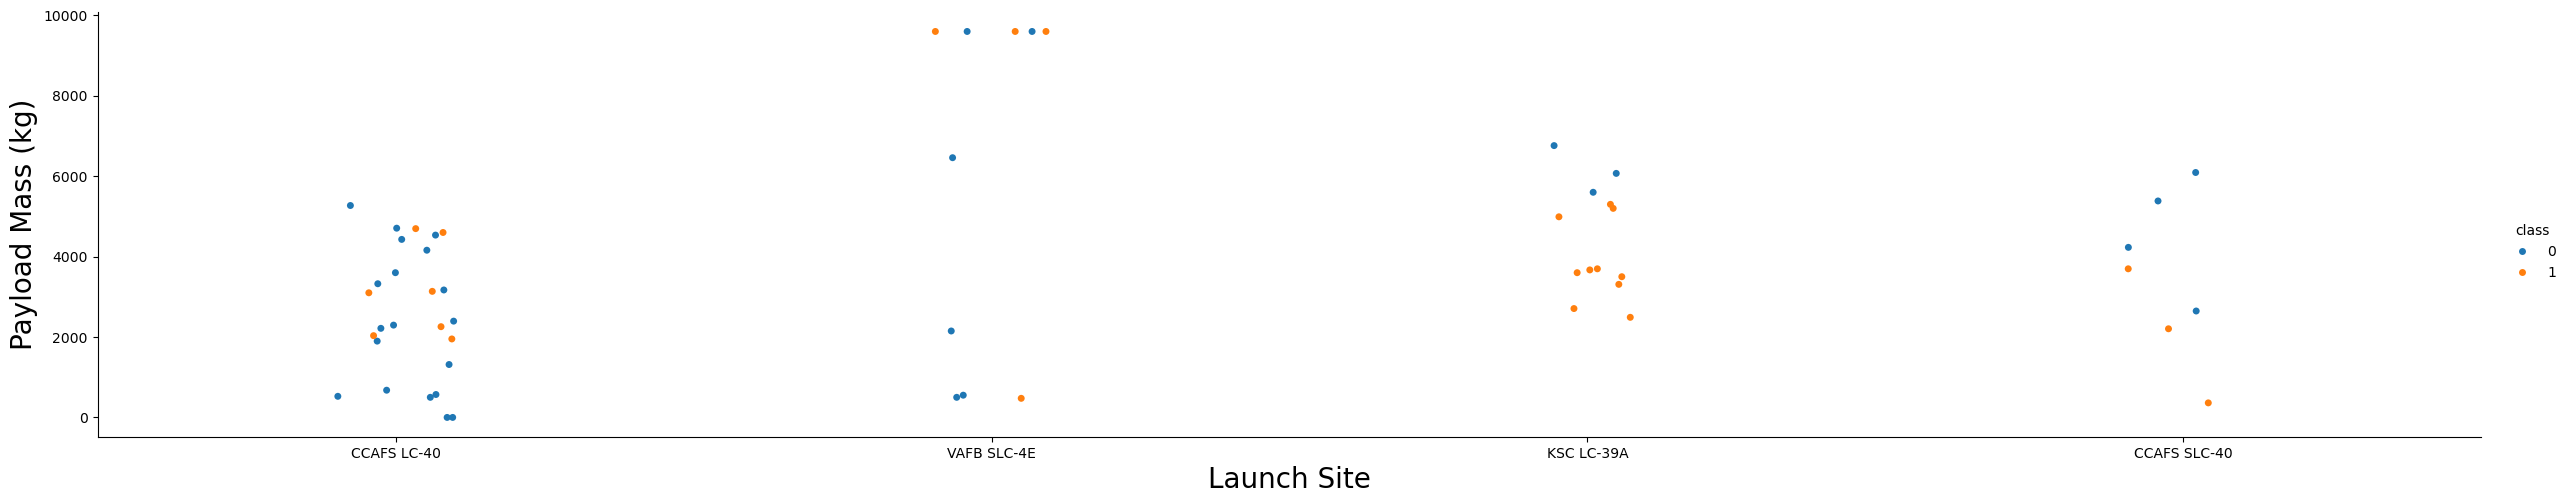

In [15]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="Launch Site", y="Payload Mass (kg)", hue="class", data=df, aspect = 5)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.xlabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [16]:
### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [22]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success = df.groupby('Orbit').mean()
orbit_success.reset_index(inplace=True)
sns.barplot(x="Orbit",y="Class",data=orbit_success,hue='Class')

TypeError: Could not convert 2015-02-11 to numeric

Analyze the ploted bar chart try to find which orbits have high sucess rate.


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


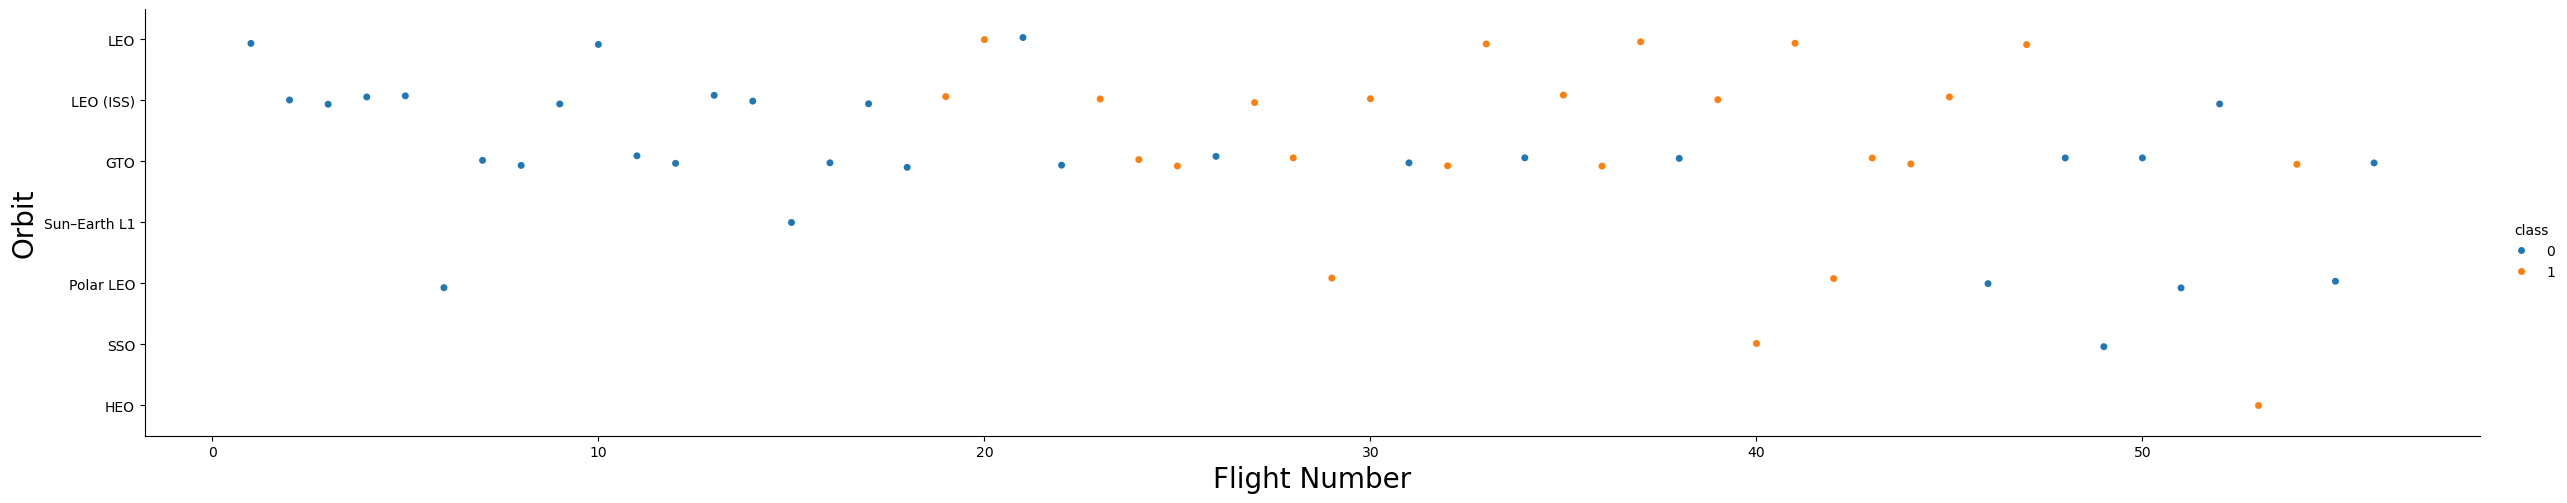

In [29]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(x="Flight Number", y="Orbit", hue="class", data=df, aspect = 5)
plt.ylabel("Orbit",fontsize=20)
plt.xlabel("Flight Number",fontsize=20)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


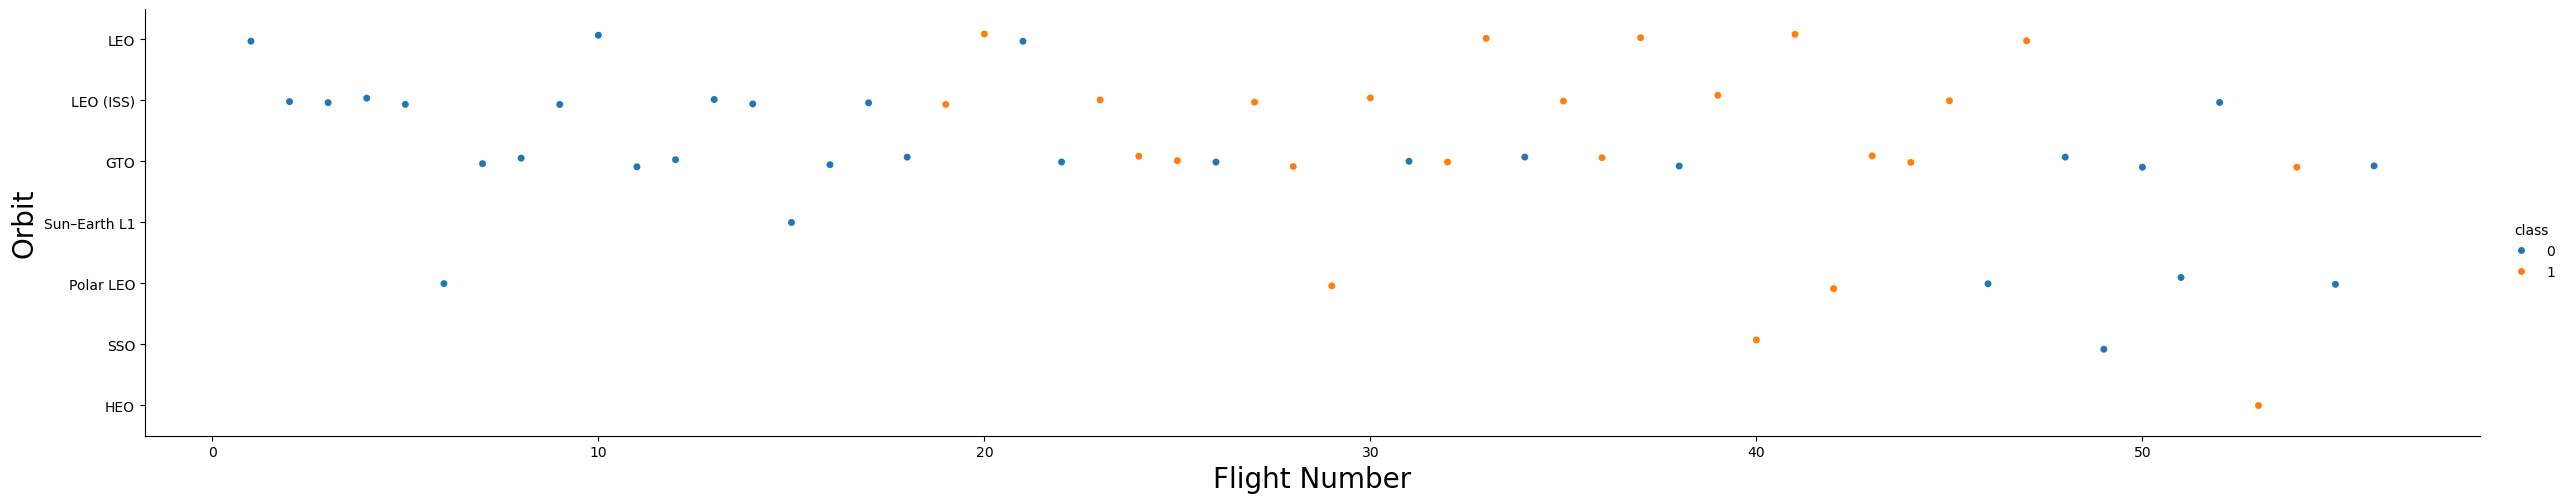

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Flight Number", y="Orbit", hue="class", data=df, aspect = 5)
plt.ylabel("Orbit",fontsize=20)
plt.xlabel("Flight Number",fontsize=20)
plt.show()




You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [31]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


/Users/torje/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


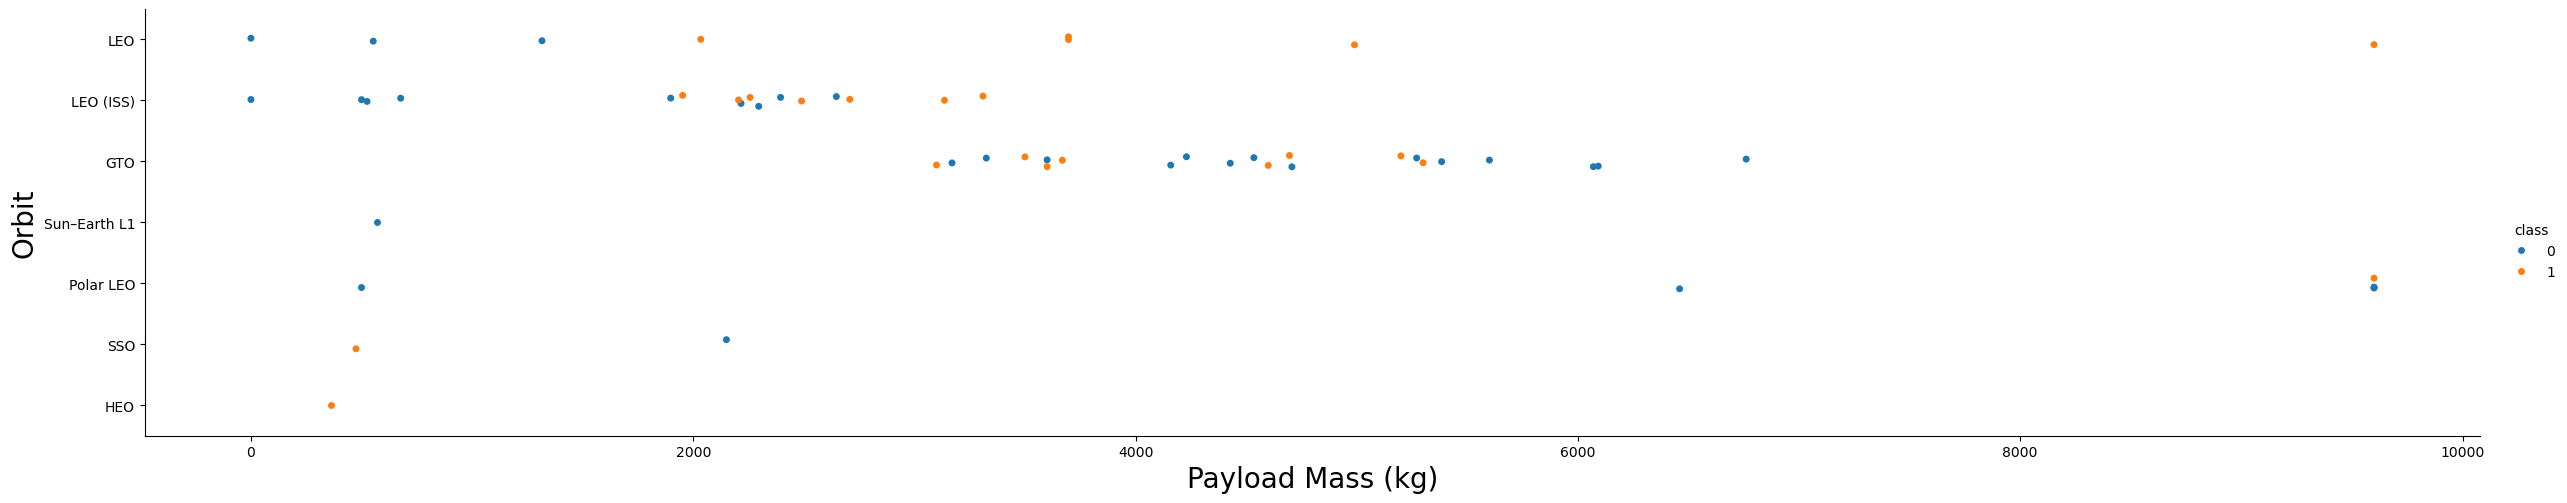

In [32]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Payload Mass (kg)", y="Orbit", hue="class", data=df, aspect = 5)
plt.ylabel("Orbit",fontsize=20)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [33]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [24]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.tail()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
85,86,2020,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1,2020
86,87,2020,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1,2020
87,88,2020,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1,2020
88,89,2020,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1,2020
89,90,2020,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1,2020


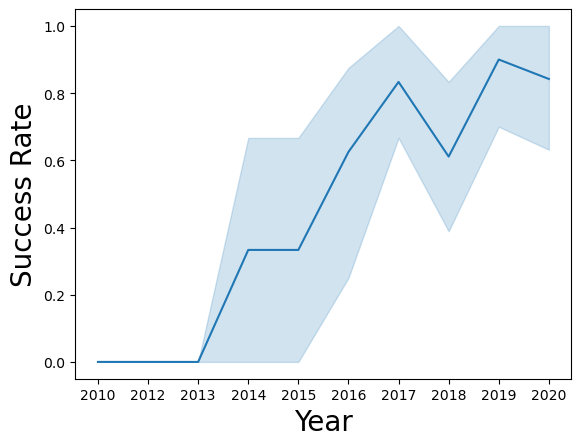

In [26]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success = df['Class'].mean()
sns.lineplot(x=year, y="Class", data=df)
plt.ylabel("Success Rate",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [23]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year(1)
df["Year"]=year
average_by_year = df.groupby(by="Year").mean()
average_by_year.reset_index(inplace=True)

TypeError: Could not convert 2010-06-04 to numeric

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [30]:
### TASK  7: Create dummy variables to categorical columns
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [33]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [32]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
